In [178]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns


#### Loading the Dataset.

In [179]:
df = pd.read_csv(r"C:\Users\sad\Documents\dailyActivity_merged.csv")
df.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [180]:
df.tail()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
935,8877689391,5/8/2016,10686,8.110000,8.110000,0.0,1.08,0.20,6.80,0.00,17,4,245,1174,2847
936,8877689391,5/9/2016,20226,18.250000,18.250000,0.0,11.10,0.80,6.24,0.05,73,19,217,1131,3710
937,8877689391,5/10/2016,10733,8.150000,8.150000,0.0,1.35,0.46,6.28,0.00,18,11,224,1187,2832
938,8877689391,5/11/2016,21420,19.559999,19.559999,0.0,13.22,0.41,5.89,0.00,88,12,213,1127,3832
939,8877689391,5/12/2016,8064,6.120000,6.120000,0.0,1.82,0.04,4.25,0.00,23,1,137,770,1849


#### Data Preprocessing and Exploratory Data Analysis

In [181]:
#Checking the Null Values.
df.isnull().sum()

Id                          0
ActivityDate                0
TotalSteps                  0
TotalDistance               0
TrackerDistance             0
LoggedActivitiesDistance    0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance         0
SedentaryActiveDistance     0
VeryActiveMinutes           0
FairlyActiveMinutes         0
LightlyActiveMinutes        0
SedentaryMinutes            0
Calories                    0
dtype: int64

In [182]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   ActivityDate              940 non-null    object 
 2   TotalSteps                940 non-null    int64  
 3   TotalDistance             940 non-null    float64
 4   TrackerDistance           940 non-null    float64
 5   LoggedActivitiesDistance  940 non-null    float64
 6   VeryActiveDistance        940 non-null    float64
 7   ModeratelyActiveDistance  940 non-null    float64
 8   LightActiveDistance       940 non-null    float64
 9   SedentaryActiveDistance   940 non-null    float64
 10  VeryActiveMinutes         940 non-null    int64  
 11  FairlyActiveMinutes       940 non-null    int64  
 12  LightlyActiveMinutes      940 non-null    int64  
 13  SedentaryMinutes          940 non-null    int64  
 14  Calories  

#### The column containing the date of the record is an object datatype and we may need to use dates in our analysis, so let’s convert this column into a datetime column:-

In [183]:
df['ActivityDate'] = pd.to_datetime(df['ActivityDate'], format="%m/%d/%Y")

In [184]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Id                        940 non-null    int64         
 1   ActivityDate              940 non-null    datetime64[ns]
 2   TotalSteps                940 non-null    int64         
 3   TotalDistance             940 non-null    float64       
 4   TrackerDistance           940 non-null    float64       
 5   LoggedActivitiesDistance  940 non-null    float64       
 6   VeryActiveDistance        940 non-null    float64       
 7   ModeratelyActiveDistance  940 non-null    float64       
 8   LightActiveDistance       940 non-null    float64       
 9   SedentaryActiveDistance   940 non-null    float64       
 10  VeryActiveMinutes         940 non-null    int64         
 11  FairlyActiveMinutes       940 non-null    int64         
 12  LightlyActiveMinutes  

#### Making a new features column  named TotalMinutes for a better analysis.

In [185]:
df['TotalMinutes'] = df['VeryActiveMinutes']+df['FairlyActiveMinutes']+df['LightlyActiveMinutes']+df['LightlyActiveMinutes']
df.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalMinutes
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,694
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,474
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776,403
3,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,481
4,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,488


#### Making a copy of DataFrame so that our original dataframe dont gets disturbed.

In [186]:
df_copy = df.copy(deep = True)
df_copy

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalMinutes
0,1503960366,2016-04-12,13162,8.500000,8.500000,0.0,1.88,0.55,6.06,0.00,25,13,328,728,1985,694
1,1503960366,2016-04-13,10735,6.970000,6.970000,0.0,1.57,0.69,4.71,0.00,21,19,217,776,1797,474
2,1503960366,2016-04-14,10460,6.740000,6.740000,0.0,2.44,0.40,3.91,0.00,30,11,181,1218,1776,403
3,1503960366,2016-04-15,9762,6.280000,6.280000,0.0,2.14,1.26,2.83,0.00,29,34,209,726,1745,481
4,1503960366,2016-04-16,12669,8.160000,8.160000,0.0,2.71,0.41,5.04,0.00,36,10,221,773,1863,488
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,8877689391,2016-05-08,10686,8.110000,8.110000,0.0,1.08,0.20,6.80,0.00,17,4,245,1174,2847,511
936,8877689391,2016-05-09,20226,18.250000,18.250000,0.0,11.10,0.80,6.24,0.05,73,19,217,1131,3710,526
937,8877689391,2016-05-10,10733,8.150000,8.150000,0.0,1.35,0.46,6.28,0.00,18,11,224,1187,2832,477
938,8877689391,2016-05-11,21420,19.559999,19.559999,0.0,13.22,0.41,5.89,0.00,88,12,213,1127,3832,526


#### Dropping the unnecessary features.

In [187]:
df_copy.drop(['Id'],axis = 1)

,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalMinutes
0,2016-04-12,13162,8.500000,8.500000,0.0,1.88,0.55,6.06,0.00,25,13,328,728,1985,694
1,2016-04-13,10735,6.970000,6.970000,0.0,1.57,0.69,4.71,0.00,21,19,217,776,1797,474
2,2016-04-14,10460,6.740000,6.740000,0.0,2.44,0.40,3.91,0.00,30,11,181,1218,1776,403
3,2016-04-15,9762,6.280000,6.280000,0.0,2.14,1.26,2.83,0.00,29,34,209,726,1745,481
4,2016-04-16,12669,8.160000,8.160000,0.0,2.71,0.41,5.04,0.00,36,10,221,773,1863,488
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,2016-05-08,10686,8.110000,8.110000,0.0,1.08,0.20,6.80,0.00,17,4,245,1174,2847,511
936,2016-05-09,20226,18.250000,18.250000,0.0,11.10,0.80,6.24,0.05,73,19,217,1131,3710,526
937,2016-05-10,10733,8.150000,8.150000,0.0,1.35,0.46,6.28,0.00,18,11,224,1187,2832,477
938,2016-05-11,21420,19.559999,19.559999,0.0,13.22,0.41,5.89,0.00,88,12,213,1127,3832,526


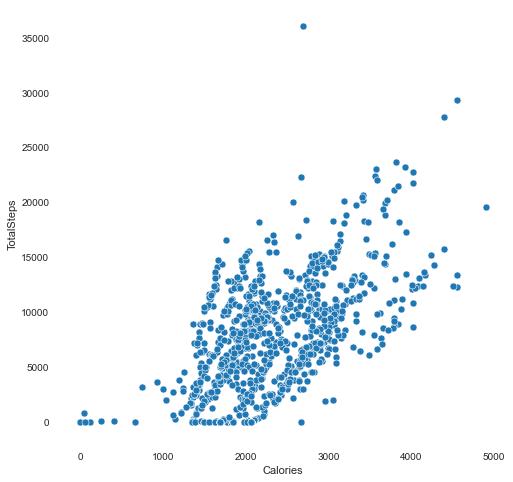

In [188]:
plt.figure(figsize = (8,8))
plt.xlabel("Calories")
plt.ylabel("TotalSteps")
sns.scatterplot(x = 'Calories', y = 'TotalSteps', data = df_copy)
plt.show()

In [189]:
pip install plotly

In [190]:
import plotly.express as px

#### Relation between Calories Burned and Total Steps.

In [191]:
figure = px.scatter(data_frame = df_copy, x="Calories",
                    y="TotalSteps", size="VeryActiveMinutes", 
                    trendline="ols", 
                    title="Relationship between Calories Burned & Total Steps")
figure.show()

#### From this plot  we can say that Calories has a kind of Linear Relation with Total Steps.
#### More Calories is burnt when Total Steps are increasing.

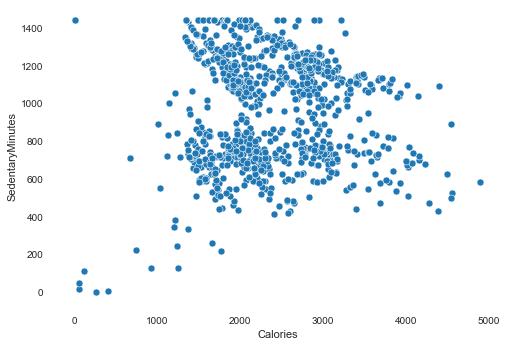

In [192]:
sns.scatterplot(y = df_copy["SedentaryMinutes"], x = df_copy["Calories"],data = df_copy)
plt.show()

In [194]:
from pandas_profiling import ProfileReport

In [195]:
pip install markupsafe==2.0.1

  Using cached MarkupSafe-2.0.1-cp39-cp39-win_amd64.whl (14 kB)
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 2.1.1
    Uninstalling MarkupSafe-2.1.1:
      Successfully uninstalled MarkupSafe-2.1.1
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\sad\\anaconda3\\Lib\\site-packages\\~0rkupsafe\\_speedups.cp39-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [196]:
pf = ProfileReport(df_copy)

variables:   0%|          | 0/16 [00:00<?, ?it/s]

correlations:   0%|          | 0/6 [00:00<?, ?it/s]

interactions [continuous]:   0%|          | 0/225 [00:00<?, ?it/s]

table:   0%|          | 0/1 [00:00<?, ?it/s]

missing:   0%|          | 0/2 [00:00<?, ?it/s]

warnings:   0%|          | 0/3 [00:00<?, ?it/s]

package:   0%|          | 0/1 [00:00<?, ?it/s]

build report structure:   0%|          | 0/1 [00:00<?, ?it/s]

#### Saving our profile report in a html file.

In [161]:
pf.to_file(output_file='output.html')

In [162]:
var = df_copy[['VeryActiveMinutes','FairlyActiveMinutes','LightlyActiveMinutes','SedentaryMinutes']].mean()
var
data = np.array(var)
data


array([ 21.16489362,  13.56489362, 192.81276596, 991.2106383 ])

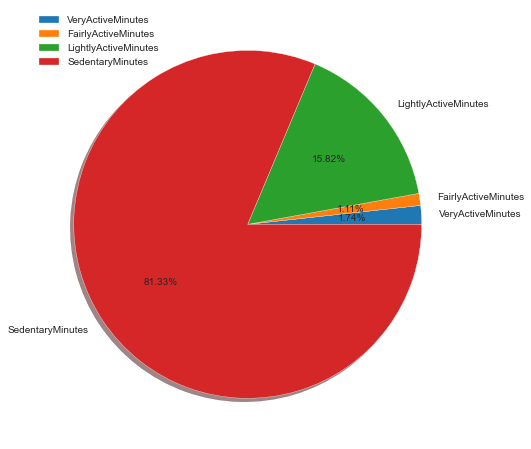

In [163]:
plt.figure(figsize = (8,8))
mylabels = ['VeryActiveMinutes','FairlyActiveMinutes','LightlyActiveMinutes','SedentaryMinutes']
plt.pie(data ,labels = mylabels,shadow = True,autopct= '%1.2f%%')
plt.legend()
plt.show()

#### Observations from the Pie Chart:-
#### 81.3% of Total inactive minutes(Sedantary Minutes) in a day
##### 15.8% of Lightly active minutes in a day
##### On an average, only 21 minutes (1.74%) were very active
#### and 1.11% (13 minutes) of fairly active minutes in a day
#### In short we can say most part of Days time is inactive.

#### Realtion between Total Distance and Calories Burned.

In [164]:
figure = px.scatter( data_frame = df_copy, x = 'Calories',y = 'TotalDistance',title = "TotalDistance VS Calories",trendline = "ols")
figure.show()

#### Observations from the ScatterPlot:-
#### As the Total Distance increases calories burned will also increase.
#### They have a Linear Relation between them.

#### Finding  the weekdays of the records and add a new column to this dataset as “Day”:-

In [165]:
df_copy["Day"] = df_copy["ActivityDate"].dt.day_name()
df_copy["Day"].head()

0      Tuesday
1    Wednesday
2     Thursday
3       Friday
4     Saturday
Name: Day, dtype: object

In [166]:
df_copy.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalMinutes,Day
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,694,Tuesday
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,474,Wednesday
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776,403,Thursday
3,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,481,Friday
4,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,488,Saturday


#### Checking the intensity of Minutes in a Day with the help of barplot.

<AxesSubplot:xlabel='Day', ylabel='SedentaryMinutes'>

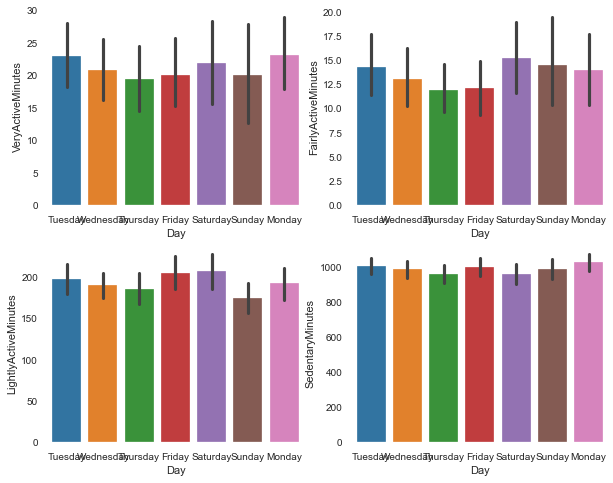

In [167]:
plt.figure(figsize = (10,8))
plt.xticks(fontsize = 10)


plt.subplot(2,2,1)
sns.barplot(x = df_copy["Day"],y = df_copy["VeryActiveMinutes"])


plt.subplot(2,2,2)
sns.barplot(x = df_copy["Day"],y = df_copy["FairlyActiveMinutes"])


plt.subplot(2,2,3)
sns.barplot(x = df_copy["Day"],y = df_copy["LightlyActiveMinutes"])

plt.subplot(2,2,4)
sns.barplot(x = df_copy["Day"],y = df_copy["SedentaryMinutes"])


#### Let’s have a look at the number of inactive minutes on each day of the week:-

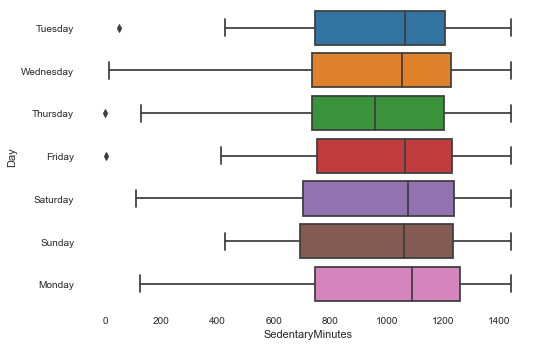

In [168]:
sns.boxplot(x = "SedentaryMinutes", y  = "Day" ,data = df_copy)
plt.show()

#### Observations:-
#### 1) Sunday along with Saturday are the most inactive days.
#### 2) Thursday is the least inactive day among all others.

#### Let’s have a look at the Calories burnt  on each day of the week:-

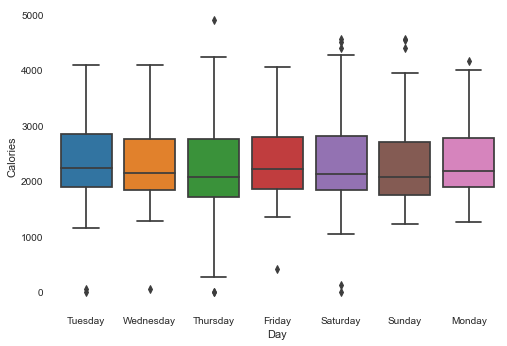

In [169]:
sns.boxplot(x = "Day", y =  "Calories",data = df_copy)
plt.show()

#### Tuesday is, one of the most active days for all individuals in the dataset, as the highest number of calories were burned on Tuesdays.

#### Conclusion:-
#### In this way we  can analyze the data collected by a smartwatch about fitness using Python along with its libraries like Pandas,Seaborn etc. Smartwatches are preferred by people who like to take care of their fitness and it can be seen that Calories burnt has a direct relationship with Total Distance and Total Steps.

 

